<a href="https://colab.research.google.com/github/NuwanNM523/ClassifyClothingImages/blob/main/Classify_clothing_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nuwan Wimalasiri**
      (Machine Learner)



In [ ]:
#Import Packages
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

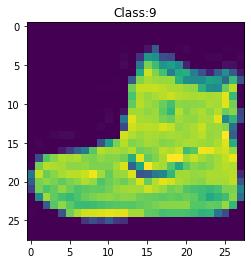

<Figure size 432x288 with 0 Axes>

In [ ]:
#Loading Dataset
from keras.datasets import fashion_mnist
(train_img, train_lab), (test_img, test_lab) = fashion_mnist.load_data()
plt.imshow(x_train[0])
plt.title('Class:{}'.format(x_lab[0]))
plt.figure()

<Figure size 432x288 with 0 Axes>

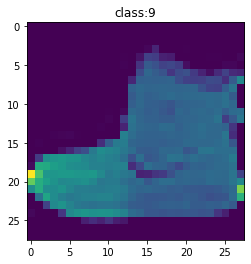

<Figure size 432x288 with 0 Axes>

In [ ]:
#Normalized the dataset
train_img = train_img.reshape(60000,28,28,1)
test_img = test_img.reshape(10000,28,28,1)
x_train = keras.utils.all_utils.normalize(x_train, axis = 1)
y_test = keras.utils.all_utils.normalize(y_test, axis = 1)
plt.imshow(x_train[0])
plt.title('class:{}'.format(x_lab[0]))
plt.figure()

In [ ]:
#Defining the model
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(3,3)) 
model.add(Conv2D(16,(3,3)))
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#Compiling the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#Fitting the model
model.fit(x_train, x_lab, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2475 - accuracy: 0.9057
Epoch 2/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2399 - accuracy: 0.9095
Epoch 3/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2327 - accuracy: 0.9118
Epoch 4/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2270 - accuracy: 0.9151
Epoch 5/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2207 - accuracy: 0.9153
Epoch 6/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2159 - accuracy: 0.9194
Epoch 7/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2078 - accuracy: 0.9216
Epoch 8/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2049 - accuracy: 0.9222
Epoch 9/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1992 - accuracy: 0.9246
Epoch 10/20
1875/1875 [==============================] - 28s 15m

In [ ]:
#Evaluating on the test data
model.evaluate(y_test,y_lab)

313/313 [==============================] - 2s 6ms/step - loss: 0.3891 - accuracy: 0.8863


[0.38911008834838867, 0.8863000273704529]

In [ ]:
#Predict the first 10 images, probability distribution
p = model.predict(y_test[:20])
print(p)

[[1.70678198e-17 1.36884407e-19 1.67335012e-15 3.80724708e-15
  3.46244725e-19 1.58779283e-08 5.28678162e-17 1.42029979e-08
  6.93674651e-14 1.00000000e+00]
 [4.43712997e-05 7.62207224e-12 9.96073842e-01 6.86060346e-08
  1.56593760e-05 4.35168801e-17 3.86590254e-03 1.22836745e-18
  1.28557829e-07 3.92186790e-16]
 [2.45055870e-16 1.00000000e+00 2.32364733e-18 2.38949672e-14
  4.01414102e-16 2.19456143e-26 1.48821554e-14 1.25187467e-33
  8.92738481e-18 1.99928832e-22]
 [1.75927585e-17 1.00000000e+00 5.95397987e-18 7.39710463e-12
  1.50980417e-22 1.45354864e-23 5.99405779e-13 1.62208141e-32
  5.65402367e-17 3.64110978e-25]
 [6.21828258e-01 4.15097305e-14 1.85414834e-03 1.48948334e-06
  1.24529834e-04 1.51605207e-15 3.76191586e-01 2.15712587e-11
  2.00000520e-12 7.88016033e-16]
 [5.95871822e-14 1.00000000e+00 2.13350291e-18 2.22034949e-15
  1.48422972e-18 1.55739697e-23 2.36315416e-14 3.35634127e-34
  8.57357154e-17 5.95608058e-22]
 [3.50185303e-09 1.52159295e-17 1.18290067e-04 3.52945984e

In [ ]:
pred = np.argmax(p, axis=1)
print(pred)
print(y_lab[:20])

[9 2 1 1 0 1 4 6 5 7 4 5 7 3 4 1 2 6 8 0]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


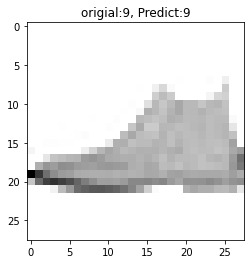

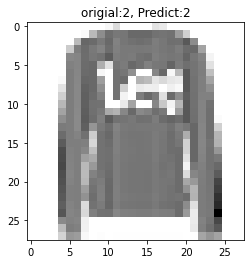

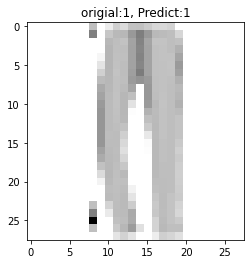

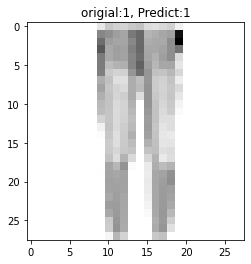

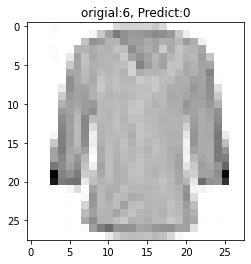

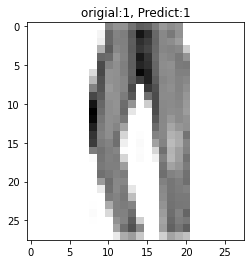

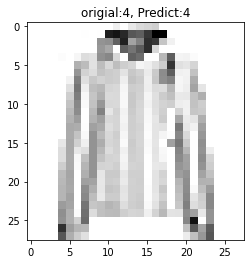

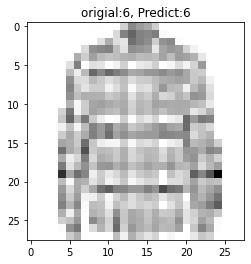

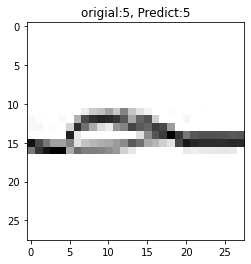

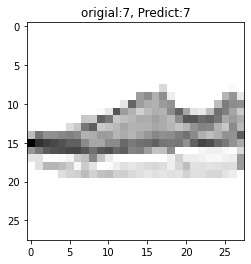

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualizing the result
for i in range(10):
  plt.imshow(y_test[i], cmap="binary")
  plt.title('origial:{}, Predict:{}'. format(y_lab[i], pred[i]))
  plt.figure()